In [1]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
# Read Data form local file path

train_df = pd.read_csv("House_Price/train.csv",index_col=0)
test_df = pd.read_csv("House_Price/test.csv",index_col=0)

In [3]:
# Display the first five rows of data
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


4.Data Processing
===

4.1 Get rid of unnecessary Colum and keep the influencing factors related to price prediction
---

In [4]:
# Remove the influence of some irrelevant data
drop_list = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MoSold','MoSold','MiscVal','LotArea','Street','Utilities',
           'Condition2','BldgType','RoofStyle','RoofMatl','KitchenAbvGr','PoolArea','LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
train_df=train_df.drop(columns=drop_list)
train_df.head()


,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Y,0,61,0,0,0,2008,WD,Normal,208500
2,20,RL,80.0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Story,...,Y,298,0,0,0,0,2007,WD,Normal,181500
3,60,RL,68.0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,2Story,...,Y,0,42,0,0,0,2008,WD,Normal,223500
4,70,RL,60.0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,2Story,...,Y,0,35,272,0,0,2006,WD,Abnorml,140000
5,60,RL,84.0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,2Story,...,Y,192,84,0,0,0,2008,WD,Normal,250000


4.2 Data cleaning and processing based on the results of data observation and analysis
---

<font size=3 >Displaying the distribution of the target data, it can be seen that it conforms to the characteristics of a normal distribution, but the variance of the data is too large.</font>

<font size=3 >It is processed by log1p to make its distribution closer to the standard normal distribution, as shown in the right figure.</font>

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price+1)'}>]], dtype=object)

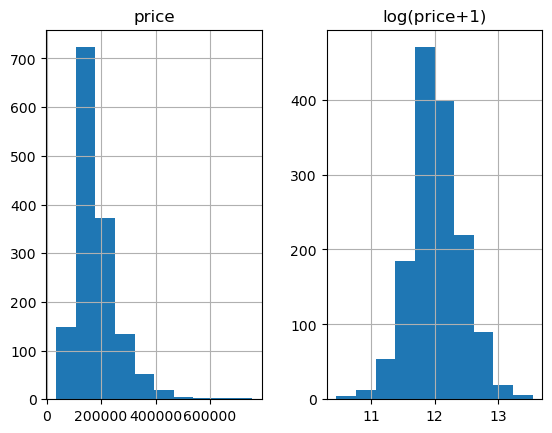

In [5]:
# Smooth the SalePrice data using log1p
prices = pd.DataFrame({"price":train_df["SalePrice"],"log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

<font size=3 >Extract target data</font>

In [6]:
# Extract training target data from raw data
y_train = np.log1p(train_df.pop('SalePrice'))

In [7]:
# Merge the data of train and test for data processing
all_df = pd.concat((train_df,test_df),axis=0)

In [8]:
# View the shape of the merged data
all_df.shape

(2919, 79)

In [9]:
# Display the first five rows of the training data
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

<font size=3 >First, stringify the category data of numeric type, and then uniformly perform one-hot processing on all the string data in the data to facilitate fitting.</font>

In [10]:
# Look at the category of the MSSubClass property
all_df['MSSubClass'].dtypes

dtype('int64')

In [11]:
# Process the value of the MSSubClass attribute as a string
all_df['MSSubClass']= all_df['MSSubClass'].astype(str)

In [12]:
# Process all values whose attributes are strings into one-hot form
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageCond_TA,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,7,5,2003,2003,196.0,856.0,856,854,1710,...,0,0,0,0,0,0,0,0,0,0
2,80.0,6,8,1976,1976,0.0,1262.0,1262,0,1262,...,0,0,0,0,0,0,0,0,0,0
3,68.0,7,5,2001,2002,162.0,920.0,920,866,1786,...,0,0,0,0,0,0,0,0,0,0
4,60.0,7,5,1915,1970,0.0,756.0,961,756,1717,...,0,0,0,0,0,0,0,0,0,0
5,84.0,8,5,2000,2000,350.0,1145.0,1145,1053,2198,...,0,0,0,0,0,0,0,0,0,0


<font size=3 >Handle defaults：Supplement with the average value of the column where the default value is located.</font>

In [13]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

BsmtUnfSF       1461
BsmtFinSF2      1461
BsmtFinSF1      1461
LowQualFinSF    1460
KitchenAbvGr    1460
LotArea         1460
PoolArea        1460
MiscVal         1460
MoSold          1460
LotFrontage      486
dtype: int64

In [14]:
mean_cols= all_dummy_df.mean()
mean_cols.head(10)

LotFrontage       69.305795
OverallQual        6.089072
OverallCond        5.564577
YearBuilt       1971.312778
YearRemodAdd    1984.264474
MasVnrArea       102.201312
TotalBsmtSF     1051.777587
1stFlrSF        1159.581706
2ndFlrSF         336.483727
GrLivArea       1500.759849
dtype: float64

In [15]:
# Pad default value to average
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [16]:
# Check if there are any remaining default values
all_dummy_df.isnull().sum().sum()

0

4.3 Data Standardization
---

In [17]:
# Filter out all properties of numeric type
numeric_cols = all_df.columns[all_df.dtypes!='object']
numeric_cols

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold', 'LotArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'KitchenAbvGr',
       'PoolArea', 'MiscVal', 'MoSold'],
      dtype='object')

<font size=3 >Tested the z_score method is the best.</font>

In [18]:
# Calculate data normalization
numeric_col_means = all_dummy_df.loc[:,numeric_cols].mean()
numeric_col_max = all_dummy_df.loc[:,numeric_cols].max()
numeric_col_min = all_dummy_df.loc[:,numeric_cols].min()
numeric_col_std = all_dummy_df.loc[:,numeric_cols].std()
numeric_col_sum = all_dummy_df.loc[:,numeric_cols].sum()

norm = 'z_score'
if norm == 'z_score':
    # Z_Score
    all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_means)/numeric_col_std
elif norm == 'min_max':
    # Min_Max
    all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_min)/(numeric_col_max-numeric_col_min)
elif norm == 'DecimalScaling':
    # DecimalScaling
    p = numeric_col_max//10 if numeric_col_max % 10 == 0 else numeric_col_max // 10 + 1
    #all_dummy_df.loc[:,numeric_cols] = all_dummy_df.loc[:,numeric_cols]/(math.pow(10,p))
elif norm == 'Mean':
    # Mean
    all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:,numeric_cols] - numeric_col_means) / (numeric_col_max - numeric_col_min)
elif norm == 'Vector':
    # Vector
    all_dummy_df.loc[:,numeric_cols] = all_dummy_df.loc[:,numeric_cols] / numeric_col_sum
elif norm == 'lg':
    # lg
    all_dummy_df.loc[:,numeric_cols] = all_dummy_df.loc[:,numeric_cols].apply(np.log)/ numeric_col_max.apply(np.log)
elif norm == 'SoftMax':
    # SoftMax
    all_dummy_df.loc[:,numeric_cols] = all_dummy_df.loc[:,numeric_cols].apply(np.exp) / all_dummy_df.loc[:,numeric_cols].apply(np.exp).sum()
elif norm == 'Sigmoid':
    # Sigmoid
    all_dummy_df.loc[:,numeric_cols] = 1 / (1 + (0-all_dummy_df.loc[:,numeric_cols]).apply(np.exp))
                                        
print(all_dummy_df.loc[:,numeric_cols])

      LotFrontage  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                     
1       -0.202033     0.646073    -0.507197   1.046078      0.896679   
2        0.501785    -0.063174     2.187904   0.154737     -0.395536   
3       -0.061269     0.646073    -0.507197   0.980053      0.848819   
4       -0.436639     0.646073    -0.507197  -1.859033     -0.682695   
5        0.689469     1.355319    -0.507197   0.947040      0.753100   
...           ...          ...          ...        ...           ...   
2915    -2.266564    -1.481667     1.289537  -0.043338     -0.682695   
2916    -2.266564    -1.481667    -0.507197  -0.043338     -0.682695   
2917     4.255477    -0.772420     1.289537  -0.373465      0.561660   
2918    -0.342796    -0.772420    -0.507197   0.682939      0.370221   
2919     0.220258     0.646073    -0.507197   0.715952      0.465941   

      MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  .

In [19]:
# After the data processing is completed, the data is re-divided into train and test parts
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [20]:
dummy_train_df.shape,dummy_test_df.shape

((1460, 291), (1459, 291))

5.Model linear fit
---



<font size=3 >First, I compared the Ridge, Random Forest, and Lasso models as target models and fitted the processed data separately.</font>

<font size=3 >Within the three models, I iterated through the corresponding hyperparameters to adjust the model parameters for the best results. During the iteration process, I chose cross-validation as a method to evaluate the model's scores and error rates. By plotting the curves of hyperparameters and cross-validation scores, it can be observed that the model fitting results can be locally optimized to the best.</font>

<font size=3 >Ridge Regression</font>

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [22]:
# Extract the input of the model
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [23]:
# Use the cross validation method that comes with Sklearn to test the model
alphas = np.logspace(-3,2,50)
test_scores = []
error_min = 1
best_alpha = 0

for alpha in alphas:
    clf = Ridge(alpha)
    #print(alpha)
    test_score = np.mean(np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')))
    #print(test_score)
    test_scores.append(test_score)
    if test_score < error_min:
        error_min = test_score
        best_alpha = alpha
print(error_min,best_alpha)

0.1345920889240159 15.264179671752334


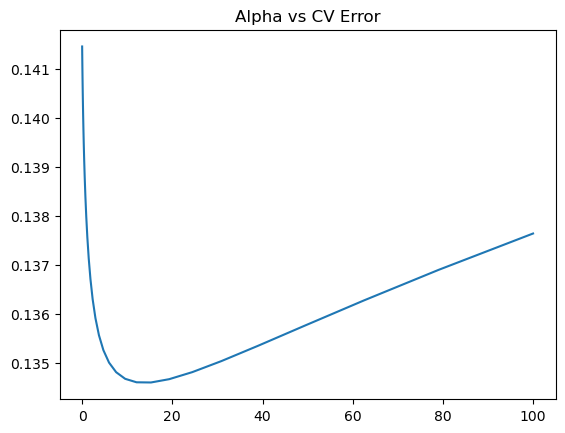

In [24]:
# The visualized results show the error curves under different hyperparameters
plt.plot(alphas,test_scores)
plt.title("Alpha vs CV Error");

<font size=3 >Random Forest</font>

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
# Use the cross validation method that comes with Sklearn to test the model
max_features = np.arange(0.1,0.99,0.05)
test_scores = []
error_min = 1
best_feat = 0

for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.mean(np.sqrt(-cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error')))
    test_scores.append(test_score)
    #test_score
    if test_score < error_min:
        error_min = test_score
        best_feat = max_feat
print(error_min,best_feat)

0.13920400187878723 0.40000000000000013


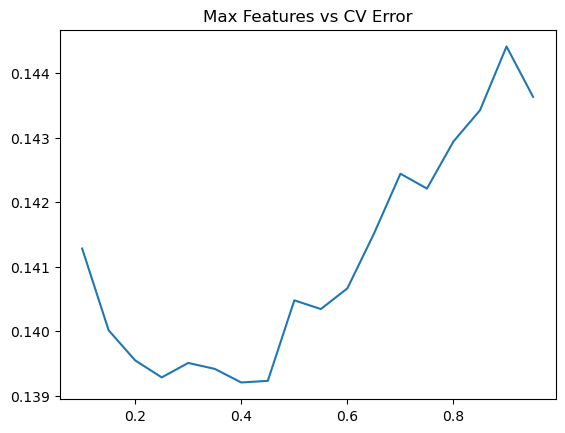

In [31]:
# The visualized results show the error curves under different hyperparameters
plt.plot(max_features,test_scores)
plt.title("Max Features vs CV Error");

<font size=3 >Lasso</font>

In [32]:
# Use the cross validation method that comes with Sklearn to test the model
from sklearn.linear_model import LinearRegression, Lasso

alphas = np.logspace(-5,0,50)
test_scores = []
error_min = 1
best_feat = 0

for alpha in alphas:    
    clf = Lasso(alpha)
    #print(alpha)
    test_score = np.mean(np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')))
    #print(test_score)
    test_scores.append(test_score)
    if test_score < error_min:
        error_min = test_score
        best_alpha = alpha
print(error_min,best_feat)

C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.384e-01, tolerance: 2.119e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+00, tolerance: 2.065e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.618e-01, tolerance: 2.063e

C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.163e-01, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.454e-01, tolerance: 2.091e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.085e-01, tolerance: 2.065e

C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.345e-02, tolerance: 2.106e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e-02, tolerance: 2.118e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.425e-02, tolerance: 2.139e

0.13335545624358575 0


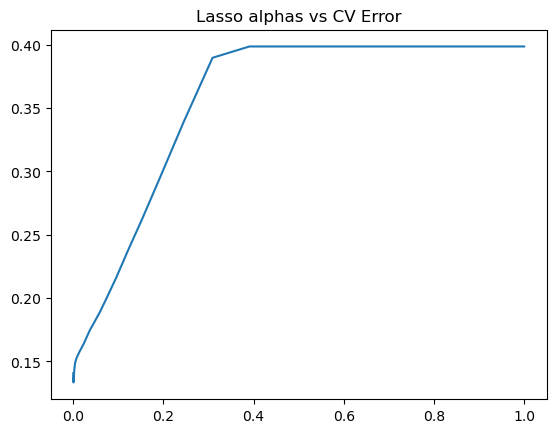

In [33]:
# The visualized results show the error curves under different hyperparameters
plt.plot(alphas,test_scores)
plt.title("Lasso alphas vs CV Error");

In [34]:
# Use the best parameters of the model to fit the results
Lasso = Lasso(alpha=0.1)

In [35]:
Lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [36]:
# log1p inverse operation
y_Lasso = np.expm1(Lasso.predict(X_test))

In [37]:
# Save the result as a DataFrame
final_df = pd.DataFrame(data={'ID':test_df.index,'SalePrice':y_Lasso})

In [38]:
final_df.head()

,ID,SalePrice
0,1461,130136.644891
1,1462,155234.261848
2,1463,153263.685943
3,1464,169930.111469
4,1465,202656.745808
